In [6]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 16:26:11--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.1’

bike+sharing+datase     [ <=>                ] 273.43K  --.-KB/s    in 0.1s    

2024-08-27 16:26:11 (2.46 MB/s) - ‘bike+sharing+dataset.zip.1’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


In [7]:
import pandas as pd
df = pd.read_csv('hour.csv')
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df['temp_hum'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']
X = df.drop(columns=['cnt'])
y = df['cnt']

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
numerical_features = ['temp', 'hum', 'windspeed', 'temp_hum', 'temp_windspeed']
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

In [9]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day_night,temp_hum,temp_windspeed
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.000000,night,0.312039,0.000000
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.000000,night,0.282504,0.000000
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.000000,night,0.282504,0.000000
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.000000,night,0.288925,0.000000
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.000000,night,0.288925,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.244898,0.2576,0.60,0.193018,night,0.250401,0.062731
17375,1,1,12,20,0,1,1,2,0.244898,0.2576,0.60,0.193018,night,0.250401,0.062731
17376,1,1,12,21,0,1,1,1,0.244898,0.2576,0.60,0.193018,night,0.250401,0.062731
17377,1,1,12,22,0,1,1,1,0.244898,0.2727,0.56,0.157870,night,0.233708,0.051308


In [10]:
!pip install category_encoders
import category_encoders as ce
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('target_encoder', ce.TargetEncoder())
])
X_encoded = categorical_pipeline.fit_transform(X[categorical_features], y)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [11]:
X_encoded

,0,1,2
0,111.114569,204.869272,98.894138
1,111.114569,204.869272,98.894138
2,111.114569,204.869272,98.894138
3,111.114569,204.869272,98.894138
4,111.114569,204.869272,98.894138
...,...,...,...
17374,111.114569,175.165493,98.894138
17375,111.114569,175.165493,98.894138
17376,111.114569,204.869272,98.894138
17377,111.114569,204.869272,98.894138


In [12]:
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)
X.columns = X.columns.astype(str)
X

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,temp_hum,temp_windspeed,0,1,2
0,0,1,0,0,6,0,0.224490,0.2879,0.81,0.000000,0.312039,0.000000,111.114569,204.869272,98.894138
1,0,1,1,0,6,0,0.204082,0.2727,0.80,0.000000,0.282504,0.000000,111.114569,204.869272,98.894138
2,0,1,2,0,6,0,0.204082,0.2727,0.80,0.000000,0.282504,0.000000,111.114569,204.869272,98.894138
3,0,1,3,0,6,0,0.224490,0.2879,0.75,0.000000,0.288925,0.000000,111.114569,204.869272,98.894138
4,0,1,4,0,6,0,0.224490,0.2879,0.75,0.000000,0.288925,0.000000,111.114569,204.869272,98.894138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,0.244898,0.2576,0.60,0.193018,0.250401,0.062731,111.114569,175.165493,98.894138
17375,1,12,20,0,1,1,0.244898,0.2576,0.60,0.193018,0.250401,0.062731,111.114569,175.165493,98.894138
17376,1,12,21,0,1,1,0.244898,0.2576,0.60,0.193018,0.250401,0.062731,111.114569,204.869272,98.894138
17377,1,12,22,0,1,1,0.244898,0.2727,0.56,0.157870,0.233708,0.051308,111.114569,204.869272,98.894138


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)



LinearRegression()

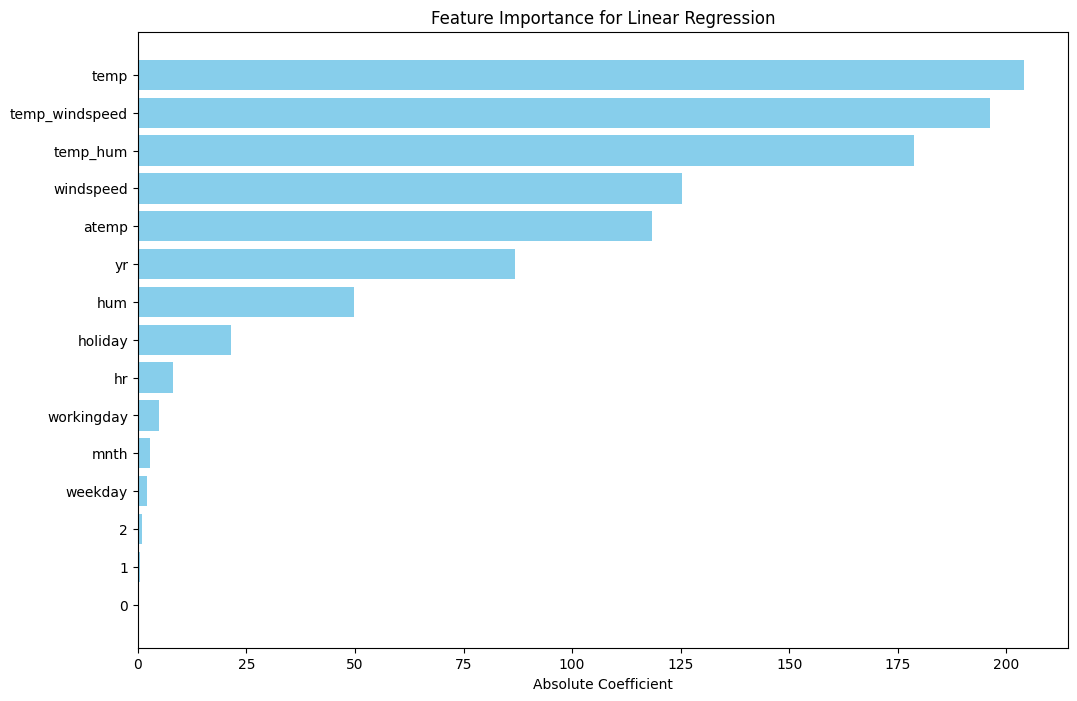

In [15]:
import matplotlib.pyplot as plt
coefficients = linear_model.coef_
features = X_train.columns

feat_importances = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
feat_importances['Absolute Coefficient'] = feat_importances['Coefficient'].abs()
feat_importances.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feat_importances['Feature'], feat_importances['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance for Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [16]:
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression (sklearn) Mean Squared Error: {mse_linear}')
print(f'Linear Regression (sklearn) R-squared: {r2_linear}')


Linear Regression (sklearn) Mean Squared Error: 14974.133860641094
Linear Regression (sklearn) R-squared: 0.5271138687719741


In [20]:
import numpy as np
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

print(X_train_with_intercept)
theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train


y_pred_scratch = X_test_with_intercept @ theta

mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print(f'Scratch Linear Regression Mean Squared Error: {mse_scratch}')
print(f'Scratch Linear Regression R-squared: {r2_scratch}')

[[  1.           0.           1.         ... 111.1145686  204.86927188
  265.22593258]
 [  1.           0.          10.         ... 198.86885633 204.86927188
  265.22593258]
 [  1.           0.          12.         ... 198.86885633 111.57928118
   98.89413845]
 ...
 [  1.           0.           8.         ... 236.01623665 204.86927188
  265.22593258]
 [  1.           0.           2.         ... 111.1145686  204.86927188
  265.22593258]
 [  1.           1.          10.         ... 198.86885633 175.16549296
  265.22593258]]
Scratch Linear Regression Mean Squared Error: 14974.13386064085
Scratch Linear Regression R-squared: 0.5271138687719819


In [18]:
from sklearn import set_config
set_config(display='diagram')

final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', LinearRegression())
])
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('target_encoder',
                                  TargetEncoder(cols=[0, 1, 2]))])),
                ('model', LinearRegression())])